In [ ]:
# Run after disconnecting everytime
!pip install scikeras[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
# Run after disconnecting everytime
!pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 MB 10.7 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import math
import time
import random
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import xgboost as xgb

#import tensorflow.keras.regularizers as regularizer


#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout

'''Faster Implementation of Sklearn using R will run code 10-100 times faster'''

from sklearnex import patch_sklearn
patch_sklearn()

from plotly.subplots import make_subplots
from random import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
#from scikeras.wrappers import KerasClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# Code goes here

data = pd.read_csv("/content/train.csv")

data.fillna(-1, inplace = True)

#test_data.fillna(-1, inplace = True)

print(data.shape)

(100000, 28)


In [ ]:
data.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,-1.000000,3,...,Good,809.98,31.94496,-1,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [ ]:
# Parent values

c = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Credit_Card", "Amount_invested_monthly", "Payment_of_Min_Amount", "Credit_Utilization_Ratio", "Outstanding_Debt"]

rows_to_drop = set()

for i in c:
    data[i] = pd.to_numeric(data[i], errors='coerce').astype('float64')
    data[i].fillna(0, inplace=True)

    median = np.median(data[i].values)

    for j in range(len(data[i].values)):
        if data[i].iloc[j] < 0 or (i == "Age" and data[i].iloc[j] >= 100):
            data[i].iloc[j] = median

parent_values = data[["Occupation", "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Credit_Card", "Amount_invested_monthly", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Utilization_Ratio", "Outstanding_Debt", "Num_Credit_Card", "Credit_Score"]]

parent_values.head(2)

,Occupation,Age,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Amount_invested_monthly,Payment_of_Min_Amount,Payment_Behaviour,Credit_Utilization_Ratio,Outstanding_Debt,Num_Credit_Card,Credit_Score
0,Scientist,23.0,19114.12,1824.843333,4.0,80.415295,0.0,High_spent_Small_value_payments,26.82262,809.98,4.0,Good
1,Scientist,23.0,19114.12,2623.714167,4.0,118.280222,0.0,Low_spent_Large_value_payments,31.94496,809.98,4.0,Good


In [ ]:
occupations = np.unique(list(parent_values["Occupation"].values))[:-1]
credit_scores = np.unique(list(parent_values["Credit_Score"].values))
payment_behaviour = np.unique(list(parent_values["Payment_Behaviour"].values))[1:]

avg_age = (max(list(parent_values["Age"].values)) - min(list(parent_values["Age"].values))) / 2

med_annual_salary = np.median(list(parent_values["Annual_Income"].values))
med_Monthly_Inhand_Salary = np.median(list(parent_values["Monthly_Inhand_Salary"].values))
med_credit_cards_num = np.median(list(parent_values["Num_Credit_Card"].values))
med_outstanding_debt = np.average(list(parent_values["Outstanding_Debt"].values))

In [ ]:
print(occupations)
print()
print(credit_scores)
print()
print(payment_behaviour)

['Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer' 'Entrepreneur'
 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager' 'Musician'
 'Scientist' 'Teacher' 'Writer']

['Good' 'Poor' 'Standard']

['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments']


In [ ]:
occupations_encoded_le = LabelEncoder()
credit_scores_encoded_le = LabelEncoder()
payment_behaviour_encoded_le = LabelEncoder()



occupations_encoded = occupations_encoded_le.fit_transform(parent_values["Occupation"].values) + random.randint(1, 100)
credit_scores_encoded = credit_scores_encoded_le.fit_transform(parent_values["Credit_Score"].values) + random.randint(1, 100)
payment_behaviour_encoded = payment_behaviour_encoded_le.fit_transform(parent_values["Payment_Behaviour"].values) + random.randint(1, 100)

random.shuffle(occupations_encoded)
random.shuffle(credit_scores_encoded)
random.shuffle(payment_behaviour_encoded)

occupations_vals_rand = occupations_encoded
credit_scores_vals_rand = credit_scores_encoded
payment_behaviour_vals_rand = payment_behaviour_encoded

print(occupations_vals_rand)
print()
print(credit_scores_vals_rand)
print()
print(payment_behaviour_vals_rand)

[45 41 47 ... 37 42 51]

[54 53 53 ... 52 53 54]

[5 8 4 ... 6 7 6]


In [ ]:
parent_values["Occupation"] = occupations_vals_rand
parent_values["Credit_Score"] = credit_scores_vals_rand
parent_values["Payment_Behaviour"] = payment_behaviour_vals_rand

print(parent_values["Occupation"].values)
print()
print(parent_values["Credit_Score"].values)
print()
print(parent_values["Payment_Behaviour"].values)

parent_values_copy = parent_values.copy()

parent_values.head(2)

[45 41 47 ... 37 42 51]

[54 53 53 ... 52 53 54]

[5 8 4 ... 6 7 6]


,Occupation,Age,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Amount_invested_monthly,Payment_of_Min_Amount,Payment_Behaviour,Credit_Utilization_Ratio,Outstanding_Debt,Num_Credit_Card,Credit_Score
0,45,23.0,19114.12,1824.843333,4.0,80.415295,0.0,5,26.82262,809.98,4.0,54
1,41,23.0,19114.12,2623.714167,4.0,118.280222,0.0,8,31.94496,809.98,4.0,53


In [ ]:
#Ver 1.0

parent_values = parent_values_copy

mutation_rate = 0.01
trials = 100
population_size = len(parent_values)
total_mutation_attempsts = 100

x_train = parent_values[["Occupation", "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Credit_Card", "Amount_invested_monthly", \
                         "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Utilization_Ratio", "Outstanding_Debt"]]
y_train = parent_values["Credit_Score"]

weights = []
weights_scores = {}
scores = []
f1_scores_testing = []
conf_matrix = {}

def generate_weights():


  for i in range(len(x_train.values[0])):
    weights.append(random.uniform(0,1.0))


def fitness(vals):

  score = 0
  for i in range(len(vals)):
    score = score + weights[i] * vals[i]

  return score


def mutate(c1, c2):


  if random.uniform(0,1) < mutation_rate:

    m_index = random.randint(0, len(c1) - 1)

    old_val_c1 = c1[m_index]
    old_val_c2 = c2[m_index]

    random.seed(time.time())
    m1 = random.choice(parent_values.iloc[:, m_index].values)

    random.seed(time.time())
    m2 = random.choice(parent_values.iloc[:, m_index].values)

    c1[m_index] = m1
    c2[m_index] = m2

  return c1, c2

def crossover(vals):

  new_vals = []

  while len(new_vals) < len(vals):

    #Picking 2 parents randomly

    random.seed(time.time())
    parent_1 = random.choice(vals)

    random.seed(time.time())
    parent_2 = random.choice(vals)

    divider = random.randint(0, len(parent_1))

    child_1 = np.concatenate((parent_1[:divider], parent_2[divider:]))
    child_2 = np.concatenate((parent_2[:divider], parent_1[divider:]))

    #Perform mutation

    child_1, child_2 = mutate(child_1, child_2)

    new_vals.append(child_1)
    new_vals.append(child_2)


  return new_vals

def update_parent_data(vals):

  for i in range(len(vals)):
    parent_values.iloc[i,:len(vals[i])] = vals[i]

def avg_scores_for_credit_score(indices, fitness_scores, credit_scores):

  cs = np.unique(credit_scores)
  avg_score_cs = {}
  temp_arr = []

  for i in range(len(cs)):

    for j in range(len(credit_scores)):

      if credit_scores[j] == cs[i]:
        temp_arr.append(fitness_scores[indices[j]])

    avg_score_cs[cs[i]] = np.mean(temp_arr.copy())
    temp_arr.clear()

  return avg_score_cs

def testing_accuracy(test_x, test_y, best_weights, credit_fitness, max_count_scredit_score):

  weights = best_weights
  scores = [fitness(p) for p in test_x.values]
  predictions =[]
  encoded_credit_scores_vals = list(credit_fitness.keys())
  credit_fitness_vals = list(credit_fitness.values())

  for i in range(len(scores)):
    if scores[i] >= credit_fitness_vals[0] and scores[i] < credit_fitness_vals[1]:
      predictions.append(encoded_credit_scores_vals[0])
    elif scores[i] >= credit_fitness_vals[1] and scores[i] < credit_fitness_vals[2]:
      predictions.append(encoded_credit_scores_vals[1])
    elif scores[i] >= credit_fitness_vals[2]:
      predictions.append(encoded_credit_scores_vals[2])
    else:
        predictions.append(max_count_scredit_score)

  return f1_score(test_y, predictions, average = "micro"), confusion_matrix(test_y, predictions, labels = None)

def main():

  generate_weights()
  best_scores = []
  best_weights = []
  best_credit_fitness = []

  columns = ["Occupation", "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Credit_Card", "Amount_invested_monthly", \
                         "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Utilization_Ratio", "Outstanding_Debt", "Credit_Score"]

  train_x, test_x, train_y, test_y = 0, 0, 0, 0

  for i in range(trials):

    train_x, test_x, train_y, test_y = train_test_split(parent_values[columns[:-1]],\
                                                          parent_values[columns[-1]], \
                                                          test_size = 0.2)

    scores = [fitness(p) for p in train_x.values]

    # Picking the 80% best choices
    best_indicies = np.argsort(scores)[:int(len(train_x) * 0.8)]
    best_selections = train_x.values[best_indicies]

    best_selection_credit_scores = train_y.values[best_indicies]


    new_data = crossover(best_selections)
    update_parent_data(new_data)

    min_score = min(scores)

    best_scores.append(min_score)

    credit_fitness = avg_scores_for_credit_score(best_indicies, scores, best_selection_credit_scores)

    weights_scores[min_score] = [weights.copy(), credit_fitness.copy()]

    unique_credit_scores_testing, counts_testing = np.unique(train_y.values, return_counts = True)
    max_counted_credit_score =  unique_credit_scores_testing[np.argmax(counts_testing)]

    temp_score, temp_conf_matrix = testing_accuracy(test_x, test_y, weights, credit_fitness,\
                                                     max_counted_credit_score)
    f1_scores_testing.append(temp_score)

    conf_matrix[temp_score] = temp_conf_matrix

    weights.clear()
    scores.clear()

    generate_weights()

  print("Best F1 Score: " , min(f1_scores_testing))


main()



Best F1 Score:  0.5235


In [ ]:
fig = make_subplots(rows = 1, cols = 1)
trace = go.Scatter(y = f1_scores_testing, x = np.linspace(1, trials, trials), marker = dict(color = "red", symbol="circle", size = 5))
fig.add_trace(trace, row = 1, col = 1)
fig.add_annotation(
    text="F1 Score vs Number of Trials",
    font_size=20,
    showarrow=False,
    xanchor="center", yanchor="bottom",
    xref="x domain", yref="y domain",
    x=0.5, y=1.1,
    bordercolor="black",
    borderpad=5,
)

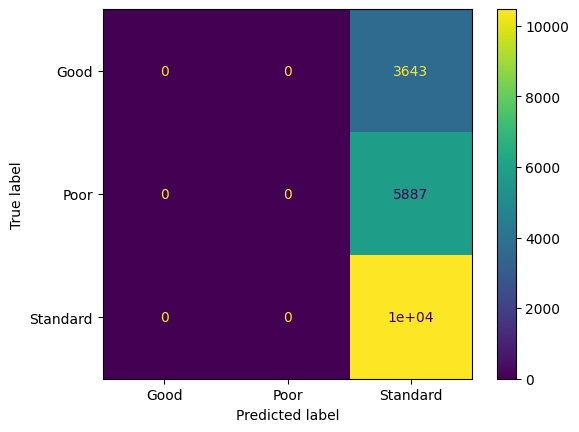

<function print>

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix[min(list(conf_matrix.keys()))],
                              display_labels= ["Good", "Poor", "Standard"])
disp.plot()
plt.show()
print

In [ ]:
#Ver 2.0

parent_values = parent_values_copy

mutation_rate = 0.01
trials = 100
population_size = len(parent_values)
total_mutation_attempsts = 100


columns = ["Occupation", "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Credit_Card", "Amount_invested_monthly", \
                         "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Utilization_Ratio", "Outstanding_Debt", "Credit_Score"]

x_train = parent_values[columns[:-1]]

y_train = parent_values[columns[-1]]

weights = []
weights_scores = {}
scores = []
f1_scores_testing = []
conf_matrix = {}

def generate_weights(prev_weights = None):

  if len(f1_scores_testing) >= 2:

    if f1_scores_testing[-1] > f1_scores_testing[-2]:

      for i in range(len(x_train.values[0])):
        if prev_weights[i] > weights[i]:
          weights[i] += np.mean(weights)
        else:
          weights[i] -= np.mean(weights)
          if weights[i] < 0:
            weights[i] = 0

  else:
    weights.clear()
    for i in range(len(x_train.values[0])):
      weights.append(random.uniform(0,1.0))


def fitness(x_train, y_train):

    predictions = np.dot(x_train, weights)
    mse = np.median((predictions - y_train) ** 2)
    return 1 / (1 + mse)


def mutate(c1, c2):

  if random.uniform(0,1) < mutation_rate:

    random.seed(time.time())
    m_index_1 = random.randint(0, len(c1) - 1)

    random.seed(time.time())
    m_index_2 = random.randint(0, len(c1) - 1)

    random.seed(time.time())
    m1 = random.choice(parent_values.iloc[:, m_index_1].values)

    random.seed(time.time())
    m2 = random.choice(parent_values.iloc[:, m_index_1].values)

    random.seed(time.time())
    m3 = random.choice(parent_values.iloc[:, m_index_2].values)

    random.seed(time.time())
    m4 = random.choice(parent_values.iloc[:, m_index_2].values)

    #Mutating 2 elements

    c1[m_index_1] = m1
    c2[m_index_1] = m2

    c1[m_index_2] = m3
    c2[m_index_2] = m4

  return c1, c2

def crossover(vals):

  new_vals = []

  while len(new_vals) < len(vals):

    #Picking 2 parents randomly

    parent_1 = random.choice(vals)
    parent_2 = random.choice(vals)

    divider = random.randint(0, len(parent_1))

    child_1 = np.concatenate((parent_1[:divider], parent_2[divider:]))
    child_2 = np.concatenate((parent_2[:divider], parent_1[divider:]))

    #Perform mutation

    child_1, child_2 = mutate(child_1, child_2)

    new_vals.append(child_1)
    new_vals.append(child_2)

  return new_vals

def update_parent_data(vals):
  temp_dataframe = pd.DataFrame()

  for c in range(len(columns)):
    temp_dataframe.insert(c, columns[c], [v for v in range(100000)])

  for i in range(len(vals)):
    temp_dataframe.iloc[i,:len(vals[i])] = vals[i]

  return temp_dataframe

def avg_scores_for_credit_score(indices, fitness_scores, credit_scores):

  cs = np.unique(credit_scores)
  avg_score_cs = {}
  temp_arr = []

  for i in range(len(cs)):

    for j in range(len(credit_scores)):

      if credit_scores[j] == cs[i]:
        temp_arr.append(fitness_scores[indices[j]])

    avg_score_cs[cs[i]] = np.mean(temp_arr.copy())
    temp_arr.clear()

  return avg_score_cs


def testing_accuracy(test_x, test_y, best_weights, credit_fitness, max_count_scredit_score):

    scores = [fitness(p1, p2) for p1, p2 in zip(test_x.values, test_y.values)]

    predictions = []
    encoded_credit_scores_vals = list(credit_fitness.keys())
    credit_fitness_vals = list(credit_fitness.values())

    for score in scores:
        if score >= credit_fitness_vals[0] and score < credit_fitness_vals[1]:
            predictions.append(encoded_credit_scores_vals[0])
        elif score >= credit_fitness_vals[1] and score < credit_fitness_vals[2]:
            predictions.append(encoded_credit_scores_vals[1])
        elif score >= credit_fitness_vals[2]:
            predictions.append(encoded_credit_scores_vals[2])
        else:
            predictions.append(max_count_scredit_score)

    return f1_score(test_y, predictions, average="micro"), confusion_matrix(test_y, predictions, labels = None)

def main():

  generate_weights()
  best_scores = []
  best_weights = []
  best_credit_fitness = []

  columns = ["Occupation", "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Credit_Card", "Amount_invested_monthly", \
                         "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Utilization_Ratio", "Outstanding_Debt", "Credit_Score"]


  for i in range(trials):

    random.seed(1345)

    train_x, test_x, train_y, test_y = train_test_split(parent_values[columns[:-1]],\
                                                          parent_values[columns[-1]], \
                                                          test_size = 0.2)

    scores = [fitness(p1, p2) for p1,p2 in zip(train_x.values, train_y.values)]

    # Picking the 80% best choices

    best_indicies = np.argsort(scores)[int(-len(train_x) * 0.8):][::-1]
    best_selections = train_x.values[best_indicies]

    best_selection_credit_scores = train_y.values[best_indicies]

    #print(best_selections)

    new_data = crossover(best_selections)
    train_x = update_parent_data(new_data)

    max_score = max(scores)

    best_scores.append(max_score)

    credit_fitness = avg_scores_for_credit_score(best_indicies, scores, best_selection_credit_scores)

    prev_weights = weights.copy()

    generate_weights(prev_weights)

    unique_credit_scores_testing, counts_testing = np.unique(train_y.values, return_counts = True)
    max_counted_credit_score =  unique_credit_scores_testing[np.argmax(counts_testing)]

    credit_fitness = {k: v for k, v in sorted(credit_fitness.items(), key=lambda item: item[1])}

    temp_score, temp_conf_matrix = testing_accuracy(test_x, test_y, weights, credit_fitness,\
                                                     max_counted_credit_score)
    f1_scores_testing.append(temp_score)

    conf_matrix[temp_score] = temp_conf_matrix

  print("Best F1 Score: ", max(f1_scores_testing))

main()

Best F1 Score:  0.77065


In [ ]:
fig = make_subplots(rows = 1, cols = 1)
trace = go.Scatter(y = f1_scores_testing, x = np.linspace(1, trials, trials), marker = dict(color = "red", symbol="circle", size = 5))
fig.add_trace(trace, row = 1, col = 1)
fig.add_annotation(
    text="F1 Score vs Number of Trials",
    font_size=20,
    showarrow=False,
    xanchor="center", yanchor="bottom",
    xref="x domain", yref="y domain",
    x=0.5, y=1.1,
    bordercolor="black",
    borderpad=5,
)

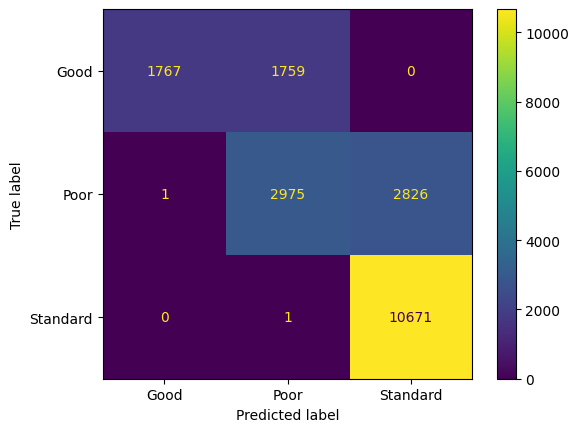

<function print>

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix[max(list(conf_matrix.keys()))],
                              display_labels= ["Good", "Poor", "Standard"])
disp.plot()
plt.show()
print

In [ ]:
#Normalize the numerical data

parent_values = parent_values_copy

selected_parent_values = parent_values[["Age", "Annual_Income", "Monthly_Inhand_Salary", "Amount_invested_monthly", \
                         "Payment_of_Min_Amount", "Credit_Utilization_Ratio", "Outstanding_Debt"]]

vals = selected_parent_values.values

normalized_vals = MinMaxScaler().fit_transform(vals)
ind = 0

for j in range(len(normalized_vals)):
  selected_parent_values.iloc[ind, :] = normalized_vals[j]
  ind += 1

selected_parent_values.insert(7, "Occupation", parent_values["Occupation"])
selected_parent_values.insert(8, "Payment_Behaviour", parent_values["Payment_Behaviour"])
selected_parent_values.insert(9, "Credit_Score", parent_values["Credit_Score"])


parent_values = selected_parent_values

parent_values.head(5)

,Age,Annual_Income,Monthly_Inhand_Salary,Amount_invested_monthly,Payment_of_Min_Amount,Credit_Utilization_Ratio,Outstanding_Debt,Occupation,Payment_Behaviour,Credit_Score
0,0.232323,0.00079,0.102087,0.040669,0.0,0.227421,0.162059,76,45,46
1,0.232323,0.00079,0.155699,0.059818,0.0,0.398165,0.162059,77,46,44
2,0.323232,0.00079,0.155699,0.041318,0.0,0.286978,0.162059,81,43,44
3,0.232323,0.00079,0.155699,0.100873,0.0,0.379262,0.162059,74,44,46
4,0.232323,0.00079,0.102087,0.020948,0.0,0.159912,0.162059,82,41,44


In [ ]:
#Ver 3.0

parent_values = selected_parent_values

mutation_rate = 0.01
trials = 100
population_size = len(parent_values)
total_mutation_attempsts = 100

scores = []
f1_scores_testing =[]
conf_matrix = {}

def fitness(x, y):

    model = tree.DecisionTreeClassifier(max_depth = 10).fit(x, y)

    predictions = model.predict(x)

    y = list(y.values)

    scores = [abs ((predictions[i] - y[i]) / y[i]) for i in range(len(y))]

    return scores


def mutate(c1, c2):

  if random.uniform(0,1) < mutation_rate:

    random.seed(time.time())
    m_index_1 = random.randint(0, len(c1) - 1)

    random.seed(time.time())
    m_index_2 = random.randint(0, len(c1) - 1)

    random.seed(time.time())
    m1 = random.choice(parent_values.iloc[:, m_index_1].values)

    random.seed(time.time())
    m2 = random.choice(parent_values.iloc[:, m_index_1].values)

    random.seed(time.time())
    m3 = random.choice(parent_values.iloc[:, m_index_2].values)

    random.seed(time.time())
    m4 = random.choice(parent_values.iloc[:, m_index_2].values)

    #Mutating 2 elements

    c1[m_index_1] = m1
    c2[m_index_1] = m2

    c1[m_index_2] = m3
    c2[m_index_2] = m4

  return c1, c2

def crossover(vals):

  new_vals = []
  attempts = 0

  while len(new_vals) < len(vals):

    #Picking 2 parents randomly

    random.seed(time.time())
    parent_1 = random.choice(vals)

    random.seed(time.time())
    parent_2 = random.choice(vals)

    divider = random.randint(0, len(parent_1))

    child_1 = np.concatenate((parent_1[:divider], parent_2[divider:]))
    child_2 = np.concatenate((parent_2[:divider], parent_1[divider:]))

    #Perform mutation
    child_1, child_2 = mutate(child_1, child_2)

    new_vals.append(child_1)
    new_vals.append(child_2)

  return new_vals

def update_parent_data(vals):

  columns_main = ["Occupation", "Age", "Annual_Income", "Monthly_Inhand_Salary", "Amount_invested_monthly", \
                         "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Utilization_Ratio", "Outstanding_Debt"]

  temp_dataframe = pd.DataFrame()

  for c in range(len(columns_main)):
    temp_dataframe.insert(c, columns_main[c], [0 for v in range(len(vals))])

  for i in range(len(temp_dataframe.values)):
    temp_dataframe.iloc[i,: len(vals[i])] = vals[i]

  return temp_dataframe

def avg_scores_for_credit_score(indices, fitness_scores, credit_scores):

  cs = np.unique(credit_scores)
  avg_score_cs = {}
  temp_arr = []

  for i in range(len(cs)):

    for j in range(len(credit_scores)):

      if credit_scores[j] == cs[i]:
        temp_arr.append(fitness_scores[indices[j]])

    avg_score_cs[cs[i]] = np.mean(temp_arr.copy())
    temp_arr.clear()

  return avg_score_cs


def testing_accuracy(train_y, test_x, test_y, score_values, max_count_scredit_score):

    credit_scores = list(score_values[0].keys())
    fitness_scores = list(score_values[0].values())

    test_y = list(test_y.values)
    test_x = list(test_x.values)

    model = tree.DecisionTreeClassifier(max_depth=10)
    model.fit(score_values[1], train_y)

    predictions = model.predict(test_x)

    scores = [abs((predictions[i] - test_y[i]) / test_y[i]) for i in range(len(test_y))]
    predictions = []

    for j in range(len(test_y)):
        for i in range(len(credit_scores)):
            if test_y[j] == credit_scores[i]:
                if abs(scores[j] / fitness_scores[0] - 1) <= 0.4 or abs(scores[j] / fitness_scores[0]) >= 0.6:
                    predictions.append(credit_scores[0])
                elif abs(scores[j] / fitness_scores[1] - 1) <= 0.4 or abs(scores[j] / fitness_scores[1]) >= 0.6:
                    predictions.append(credit_scores[1])
                elif abs(scores[j] / fitness_scores[2] - 1) <= 0.4 or abs(scores[j] / fitness_scores[2]) >= 0.6:
                    predictions.append(credit_scores[2])
                else:
                    predictions.append(max_count_scredit_score)

    return f1_score(test_y, predictions, average="micro"), confusion_matrix(test_y, predictions, labels = None)


def main():


  columns = ["Occupation", "Age", "Annual_Income", "Monthly_Inhand_Salary", "Amount_invested_monthly", \
                         "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Utilization_Ratio", "Outstanding_Debt", "Credit_Score"]


  train_x, test_x, train_y, test_y = train_test_split(parent_values[columns[:-1]],\
                                                        parent_values[columns[-1]], \
                                                        test_size = 0.2)
  main_res = {}

  for i in range(trials):

    scores = fitness(train_x, train_y)

    # Picking the 100% best choices
    best_indicies = np.argsort(scores)[:len(train_x)]
    best_selections = train_x.values[best_indicies]

    best_selection_credit_scores = train_y.values[best_indicies]

    new_data = crossover(best_selections)
    train_x = update_parent_data(new_data)

    credit_fitness = avg_scores_for_credit_score(best_indicies, scores, best_selection_credit_scores)
    avg_of_avgs = np.mean(list(credit_fitness.values()))

    main_res[avg_of_avgs] = [credit_fitness.copy(), train_x]


    unique_credit_scores_testing, counts_testing = np.unique(test_y.values, return_counts = True)
    max_counted_credit_score =  unique_credit_scores_testing[np.argmax(counts_testing)]

    temp_score, temp_conf_matrix = testing_accuracy(train_y, test_x, test_y,main_res[avg_of_avgs],\
                                                     max_counted_credit_score)
    f1_scores_testing.append(temp_score)

    conf_matrix[temp_score] = temp_conf_matrix

  if len(f1_scores_testing) > 0:
    print("Best F1 Score: ", max(f1_scores_testing))


main()

Best F1 Score:  0.9996


In [ ]:
fig = make_subplots(rows = 1, cols = 1)
trace = go.Scatter(y = f1_scores_testing, x = np.linspace(1, trials, trials), marker = dict(color = "red", symbol="circle", size = 5))
fig.add_trace(trace, row = 1, col = 1)
fig.add_annotation(
    text="F1 Score vs Number of Trials",
    font_size=20,
    showarrow=False,
    xanchor="center", yanchor="bottom",
    xref="x domain", yref="y domain",
    x=0.5, y=1.1,
    bordercolor="black",
    borderpad=5,
)

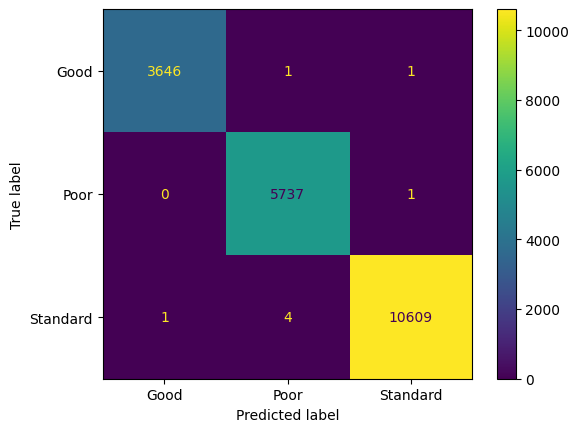

<function print>

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix[max(list(conf_matrix.keys()))],
                              display_labels= ["Good", "Poor", "Standard"])
disp.plot()
plt.show()
print